In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
from datetime import datetime, timezone

SESSION = requests.Session()
GOBLINS_URL = 'https://api.typingstats.com/event/typeracerhalloween2023/list?team=goblins&skip=0&limit=500'
GHOULS_URL = 'https://api.typingstats.com/event/typeracerhalloween2023/list?team=ghouls&skip=0&limit=500'

In [2]:
goblins_response = SESSION.get(GOBLINS_URL)
goblins_response.raise_for_status()

goblins_json = goblins_response.json()
goblins_json['data']['results'][0]

{'_id': '4YecdPgh3K4Th39Qu',
 'accountId': '237983286113210368',
 'uniqueId': 'corsairchris',
 'matches': 867,
 'points': 166398,
 'team': 'goblins',
 'profile': {'_id': '2YuA5q2b5xZGiPj8r',
  'accountId': '237983286113210368',
  'displayName': 'corsairchris',
  'customUrl': '237983286113210368',
  'avatarSrc': 'https://data.typeracer.com/misc/pic?uid=tr:corsairchris'}}

In [3]:
ghouls_response = SESSION.get(GHOULS_URL)
ghouls_response.raise_for_status()

ghouls_json = ghouls_response.json()
goblins_json['data']['results'][0]

{'_id': '4YecdPgh3K4Th39Qu',
 'accountId': '237983286113210368',
 'uniqueId': 'corsairchris',
 'matches': 867,
 'points': 166398,
 'team': 'goblins',
 'profile': {'_id': '2YuA5q2b5xZGiPj8r',
  'accountId': '237983286113210368',
  'displayName': 'corsairchris',
  'customUrl': '237983286113210368',
  'avatarSrc': 'https://data.typeracer.com/misc/pic?uid=tr:corsairchris'}}

In [4]:
goblins_df = pd.DataFrame(goblins_json['data']['results'])[['points']]
goblins_df.head()

,points
0,166398
1,159119
2,149584
3,106975
4,90149


In [5]:
# 1-index because ranking starts at 1
goblins_df.rename(index=lambda x: x + 1, inplace=True)
goblins_df.head()

,points
1,166398
2,159119
3,149584
4,106975
5,90149


In [6]:
ghouls_df = pd.DataFrame(ghouls_json['data']['results'])[['points']]
ghouls_df.head()

,points
0,250013
1,206326
2,106307
3,93345
4,70278


In [7]:
# 1-index because ranking starts at 1
ghouls_df.rename(index=lambda x: x + 1, inplace=True)
ghouls_df.head()

,points
1,250013
2,206326
3,106307
4,93345
5,70278


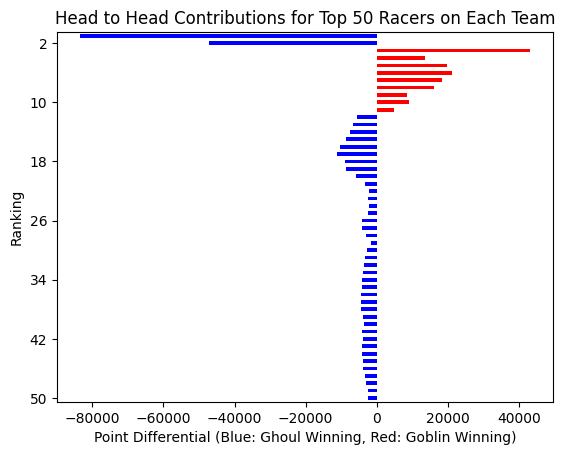

In [8]:
top_50_difference = goblins_df['points'].iloc[0:50] - ghouls_df['points'].iloc[0:50]
ax = top_50_difference.plot(
    kind='barh',
    title='Head to Head Contributions for Top 50 Racers on Each Team',
    xlabel='Point Differential (Blue: Ghoul Winning, Red: Goblin Winning)', 
    ylabel='Ranking',
    color=top_50_difference.apply(lambda x: 'red' if x > 0 else 'blue')
)
ax.set_yticks(range(1, 51, 8))
ax.invert_yaxis()

plt.savefig(f'./results/{datetime.now(timezone.utc)}.png')
plt.show()